#Lab 5&6
## Yash Bhargava
## B20AI050

##Imports

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##Loading dataset

In [163]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##Question 1

### Relationship among variables

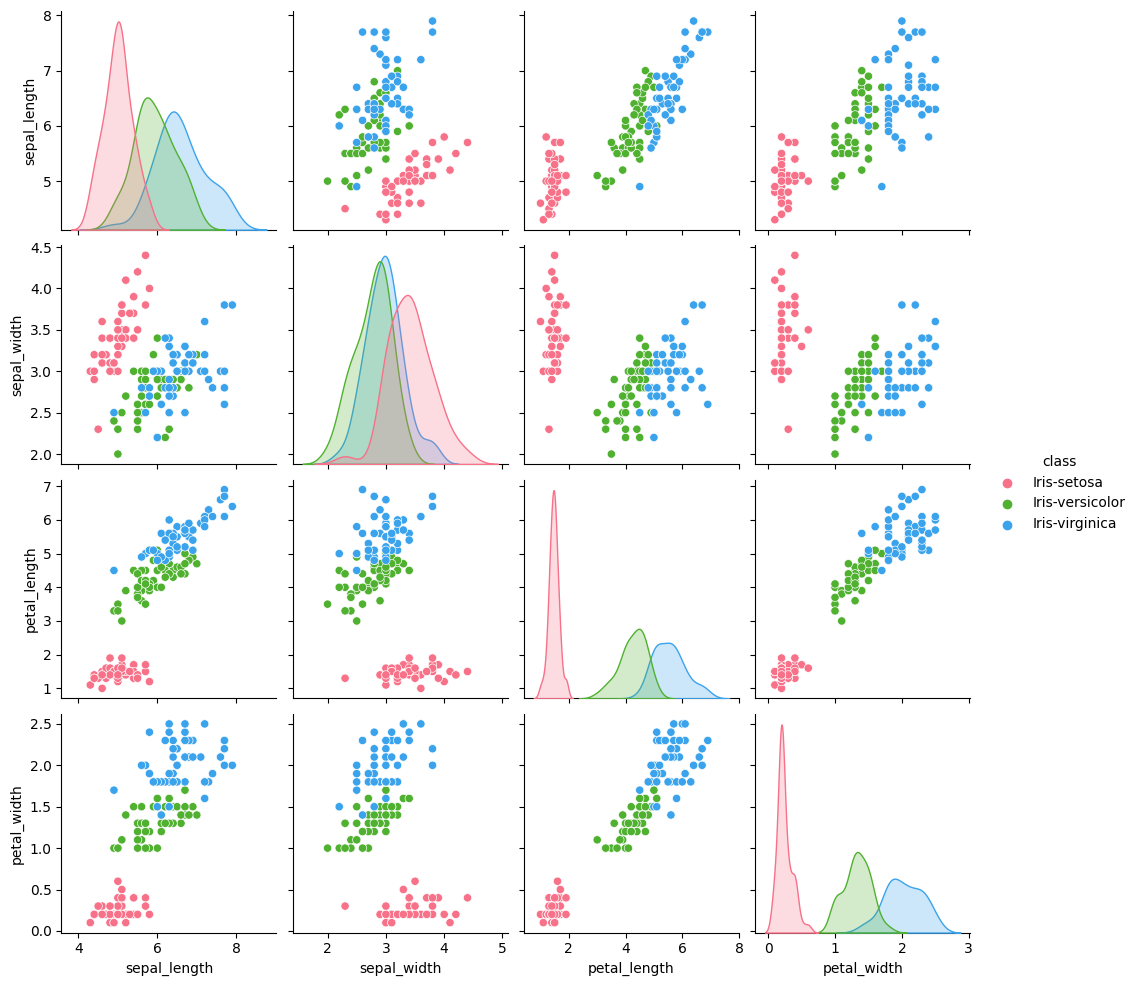

In [164]:
sns.pairplot(df, hue='class', palette='husl')

In [165]:
fig = px.scatter_matrix(df, color='class', labels={col:col.replace('_', ' ').capitalize() for col in df.columns})
fig.update_layout(
    title="Scatter Matrix",
    width=1300,
    height=1000,
)
fig.show()

##Question 2

###Exploring linear separability

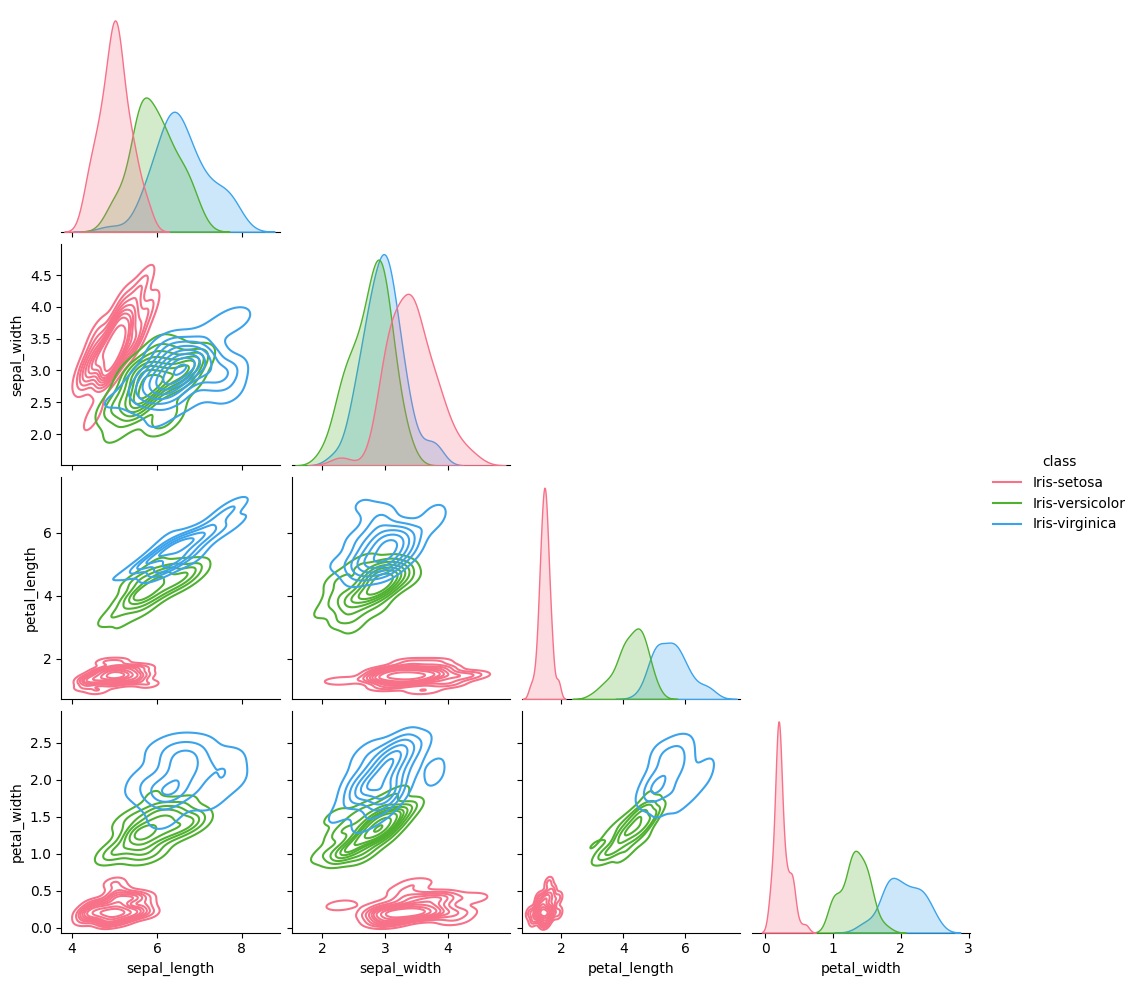

In [166]:
sns.pairplot(df, hue='class', palette='husl', kind='kde', corner=True)

In [167]:
fig = px.scatter_matrix(df, 
    color='class',
    dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"], 
    labels={col:col.replace('_', ' ').capitalize() for col in df.columns},
    color_discrete_map={
        'Iris-setosa': '#f77189', 
        'Iris-versicolor': '#50b131', 
        'Iris-virginica': '#3ba3ec'
    }
)

fig.update_layout(
    title="Scatter Matrix",
    width=1000,
    height=800,
)
fig.update_traces(diagonal_visible=False)

fig.show()

As we can see from the scatter plots of every possible attribute combination, the class in `pink`, i.e., Iris-setosa is the most visibly separated from the other classes.

Thus, we can say that the class `Iris-setosa` is the most linearly separable class.

##Question 3
### Exploring Adult Dataset

In [168]:
adult_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']

adult_df = pd.read_csv(adult_url, header=None, names=column_names)
adult_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [169]:
adult_df[adult_df['capital_gain'] != 0].min()

age                                17
workclass                           ?
fnlwgt                          19302
education                        10th
education_num                       1
marital_status               Divorced
occupation                          ?
relationship                  Husband
race               Amer-Indian-Eskimo
sex                            Female
capital_gain                      114
capital_loss                        0
hours_per_week                      1
native_country                      ?
income                          <=50K
dtype: object

###Analyzing numerical attributes

<Axes: xlabel='Count', ylabel='education_num'>

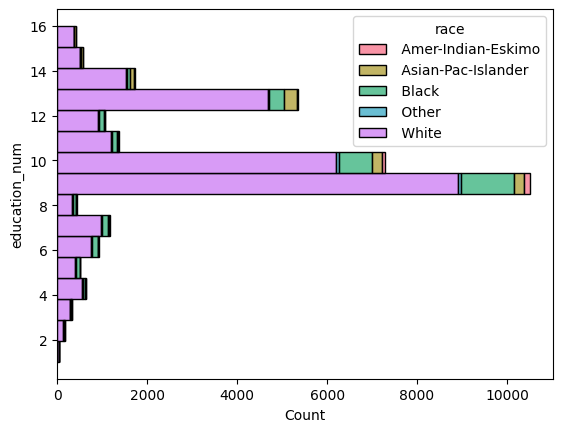

In [170]:
sns.histplot(adult_df.sort_values(by='race'), y='education_num', hue='race', bins=16, palette='husl', multiple='stack')

<Axes: xlabel='education_num', ylabel='income'>

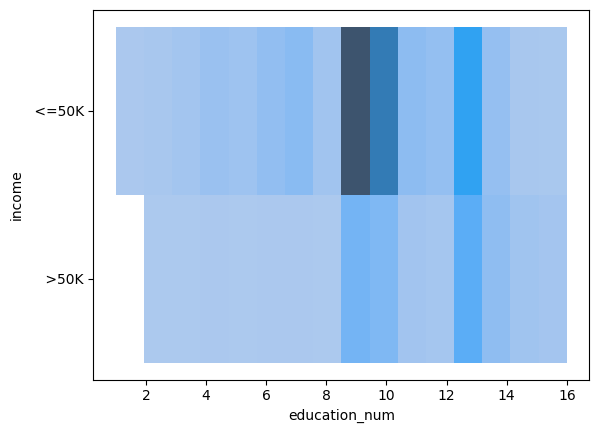

In [171]:
sns.histplot(adult_df, x='education_num', y='income', bins=16)

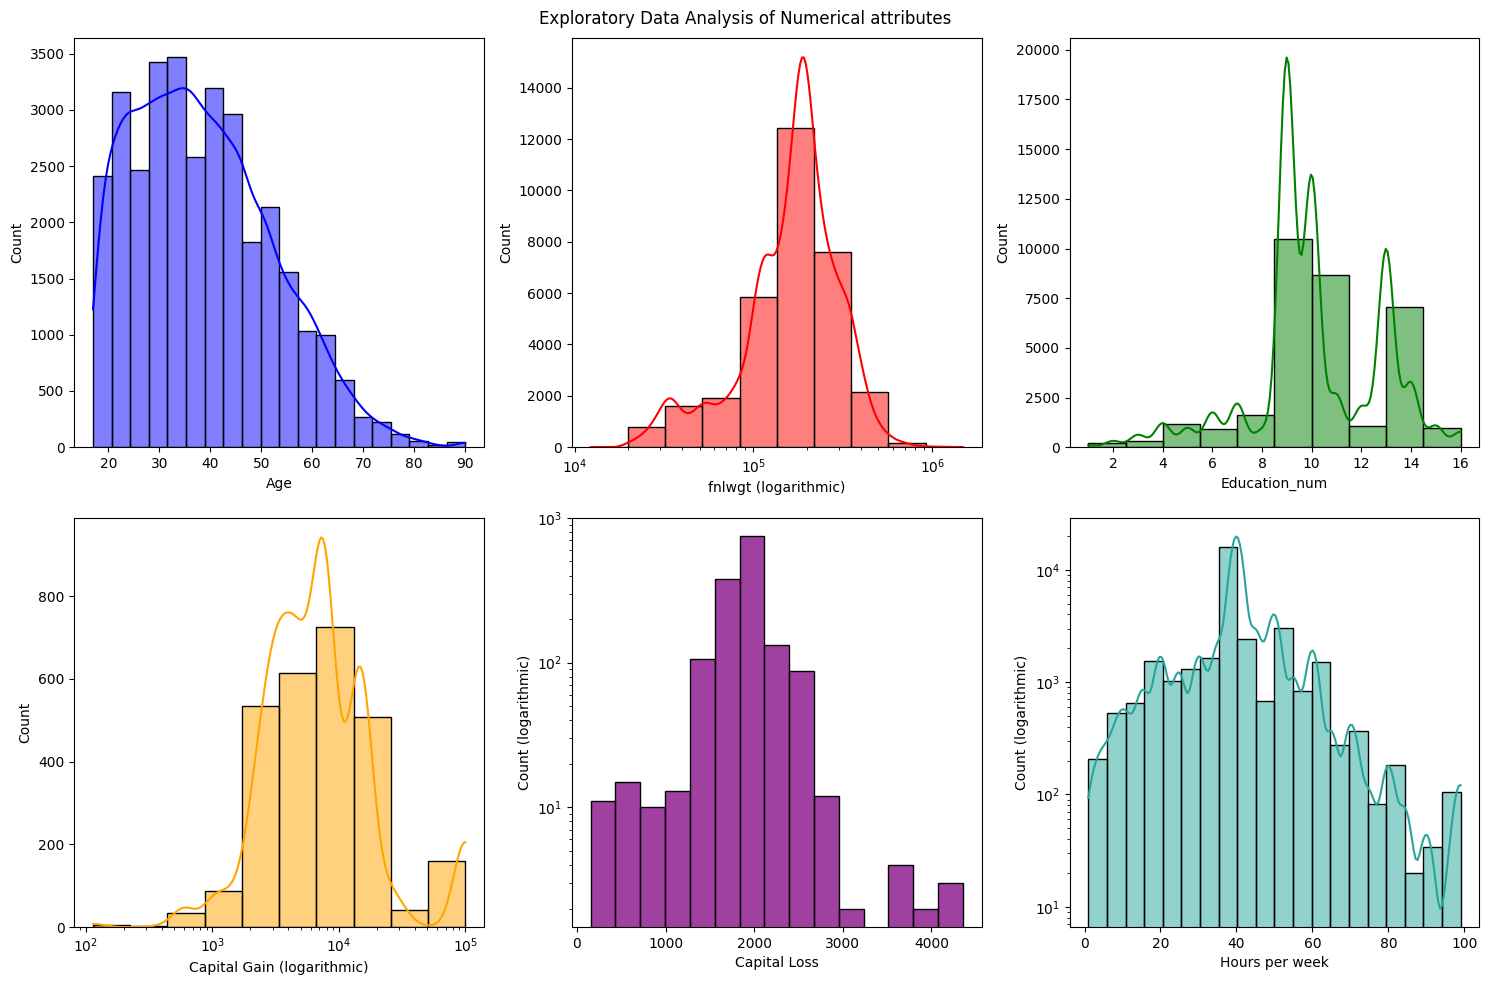

In [177]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

fig1 = axs[0, 0]
sns.histplot(ax=fig1, data=adult_df, x='age', bins=20, color='blue', kde=True)
fig1.set_xlabel('Age')
fig1.set_ylabel('Count')

fig2 = axs[0, 1]
sns.histplot(ax=fig2, data=adult_df, x='fnlwgt', bins=10, color='red', kde=True, log_scale=True)
fig2.set_xlabel('fnlwgt (logarithmic)')
fig2.set_ylabel('Count')

fig3 = axs[0, 2]
sns.histplot(ax=fig3, data=adult_df, x='education_num', bins=10, color='green', kde=True)
fig3.set_xlabel('Education_num')
fig3.set_ylabel('Count')

fig4 = axs[1, 0]
sns.histplot(ax=fig4, data=adult_df[adult_df['capital_gain'] != 0], x='capital_gain', bins=10, color='orange', kde=True, log_scale=True)
fig4.set_xlabel('Capital Gain (logarithmic)')
fig4.set_ylabel('Count')

fig5 = axs[1, 1]
sns.histplot(ax=fig5, data=adult_df[adult_df['capital_loss'] != 0], x='capital_loss', bins=15, color='purple', log_scale={False, True})
fig5.set_xlabel('Capital Loss')
fig5.set_ylabel('Count (logarithmic)')

fig6 = axs[1, 2]
sns.histplot(ax=fig6, data=adult_df, x='hours_per_week', bins=20, color='#26a69a', kde=True, log_scale={False, True})
fig6.set_xlabel('Hours per week')
fig6.set_ylabel('Count (logarithmic)')

fig.suptitle('Exploratory Data Analysis of Numerical attributes')
plt.tight_layout()
plt.show()

###Analyzing categorical attributes

<Axes: xlabel='Race'>

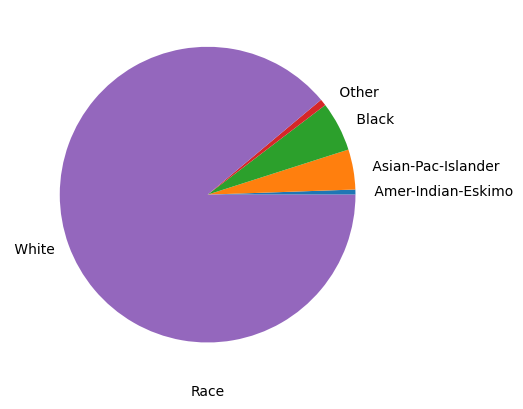

In [188]:
fig = adult_df.groupby(['race'])['capital_gain'].sum().plot.pie(y='race')
fig.set_xlabel('Race')
fig.set_ylabel('')
fig

<ipython-input-200-3eab309ca744>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 2000x800 with 0 Axes>

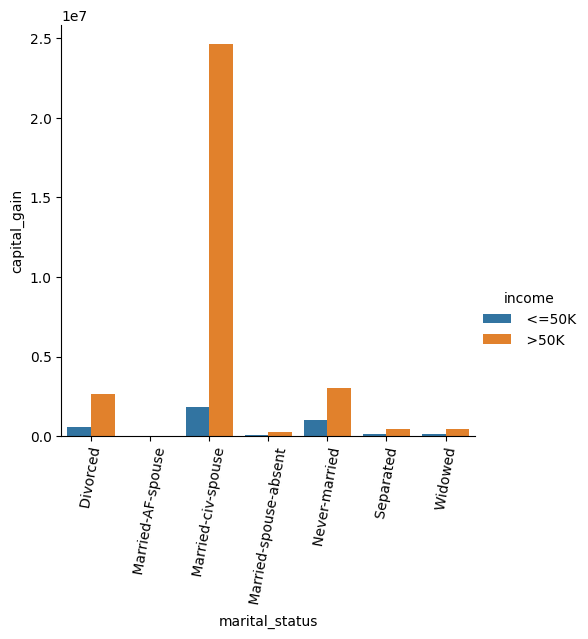

In [200]:
plt.figure(figsize=(20,8))
sns.catplot(data=adult_df.groupby(['marital_status', 'income']).sum().reset_index(), x='marital_status', y='capital_gain', hue='income', kind='bar')
plt.xticks(rotation=80)
plt.show()

<ipython-input-215-c850e1d8db84>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 2000x800 with 0 Axes>

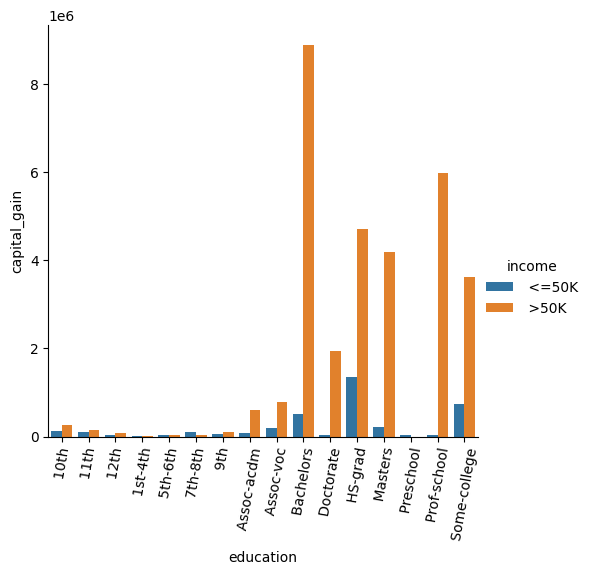

In [215]:
plt.figure(figsize=(20,8))
temp = adult_df.groupby(['education', 'income']).sum().reset_index()
sns.catplot(data=temp[temp['capital_gain'] != 0], x='education', y='capital_gain', hue='income', kind='bar')
plt.xticks(rotation=80)
plt.show()

<ipython-input-207-26efa33ba0fb>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 2000x800 with 0 Axes>

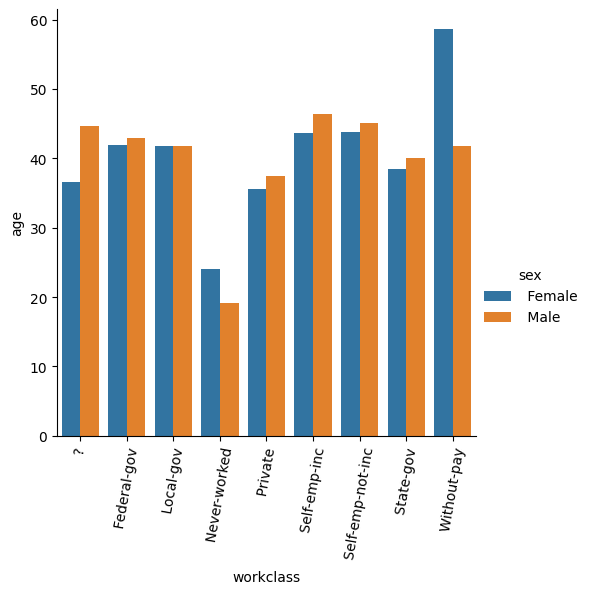

In [207]:
plt.figure(figsize=(20,8))
sns.catplot(data=adult_df.groupby(['workclass', 'sex']).mean().reset_index(), x='workclass', y='age', hue='sex', kind='bar')
plt.xticks(rotation=80)
plt.show()

<ipython-input-216-e70a63f443c5>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 2000x800 with 0 Axes>

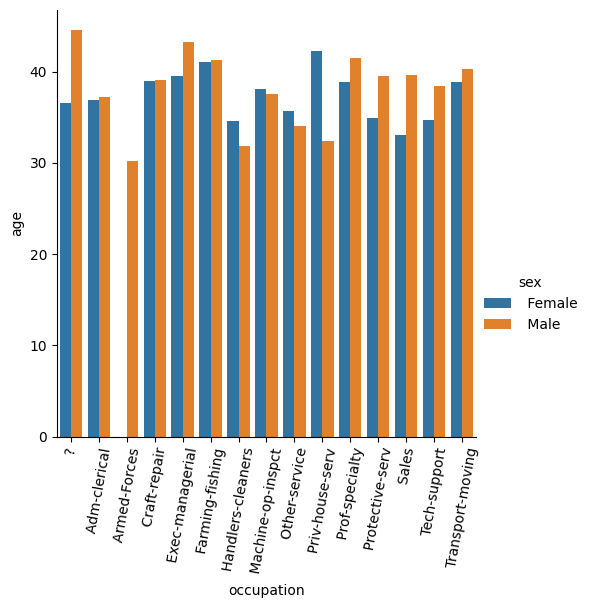

In [216]:
plt.figure(figsize=(20,8))
sns.catplot(data=adult_df.groupby(['occupation', 'sex']).mean().reset_index(), x='occupation', y='age', hue='sex', kind='bar')
plt.xticks(rotation=80)
plt.show()

<ipython-input-220-05d1c6d84bb7>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 2000x800 with 0 Axes>

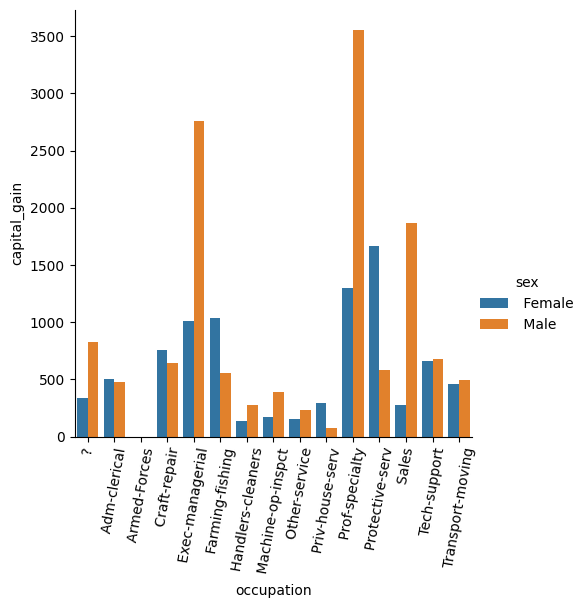

In [220]:
plt.figure(figsize=(20,8))
sns.catplot(data=adult_df.groupby(['occupation', 'sex']).mean().reset_index(), x='occupation', y='capital_gain', hue='sex', kind='bar')
plt.xticks(rotation=80)
plt.show()

<ipython-input-232-6f8a153bab63>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



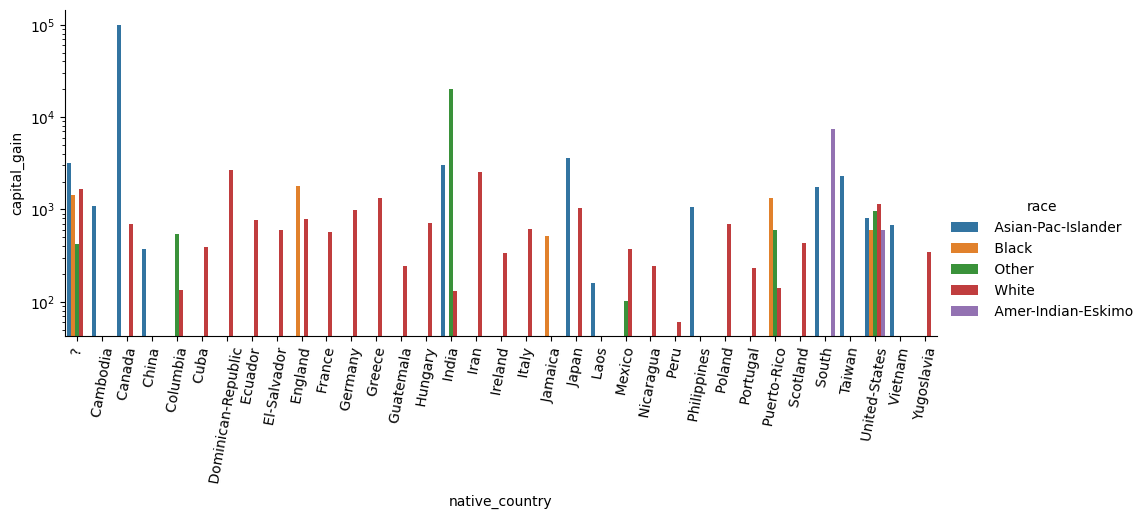

In [232]:
temp = adult_df.groupby(['native_country', 'race']).mean().reset_index()
fig = sns.catplot(data=temp[temp['capital_gain'] != 0], x='native_country', y='capital_gain', hue='race', kind='bar', height=4, aspect=2.5)
fig.set(yscale='log')
plt.xticks(rotation=80)
plt.show()

<ipython-input-233-2520b44a8e72>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



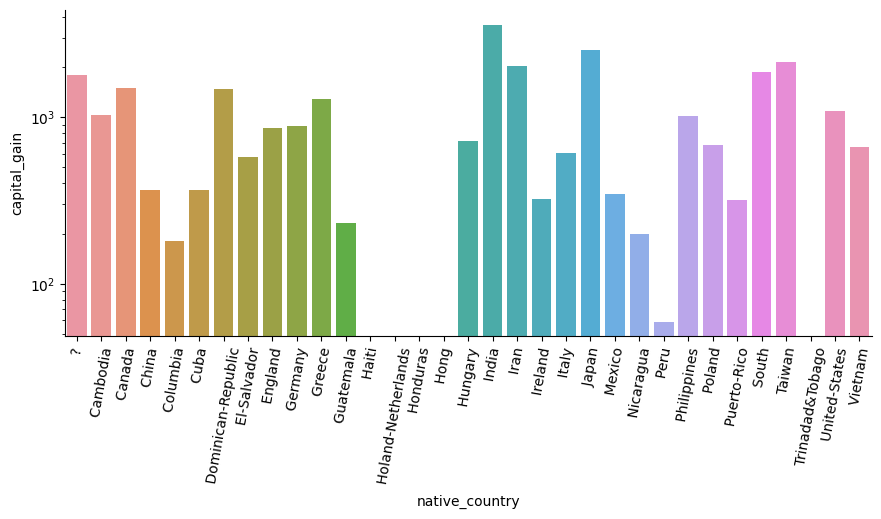

In [233]:
temp = adult_df.groupby(['native_country']).mean().reset_index()
fig = sns.catplot(data=temp[temp['capital_loss'] != 0], x='native_country', y='capital_gain', kind='bar', height=4, aspect=2.3)
fig.set(yscale='log')
plt.xticks(rotation=80)
plt.show()

<ipython-input-236-592bcb2e4ae5>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Figure size 2000x800 with 0 Axes>

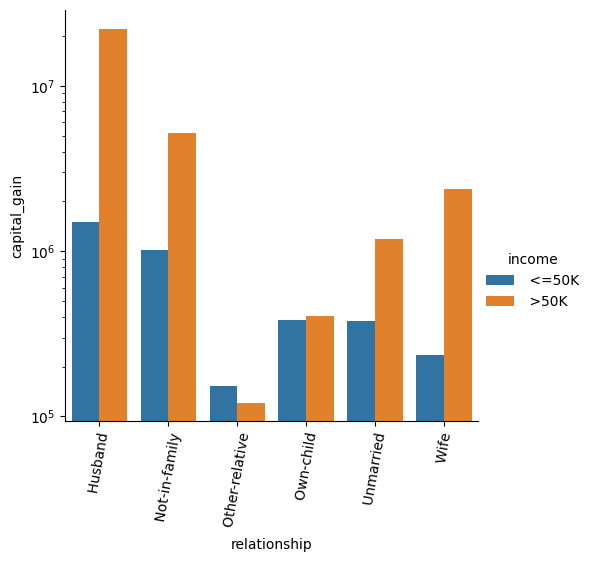

In [236]:
plt.figure(figsize=(20,8))
fig = sns.catplot(data=adult_df.groupby(['relationship', 'income']).sum().reset_index(), x='relationship', y='capital_gain', hue='income', kind='bar')
plt.xticks(rotation=80)
fig.set(yscale='log')
plt.show()

###Bivariate Analysis

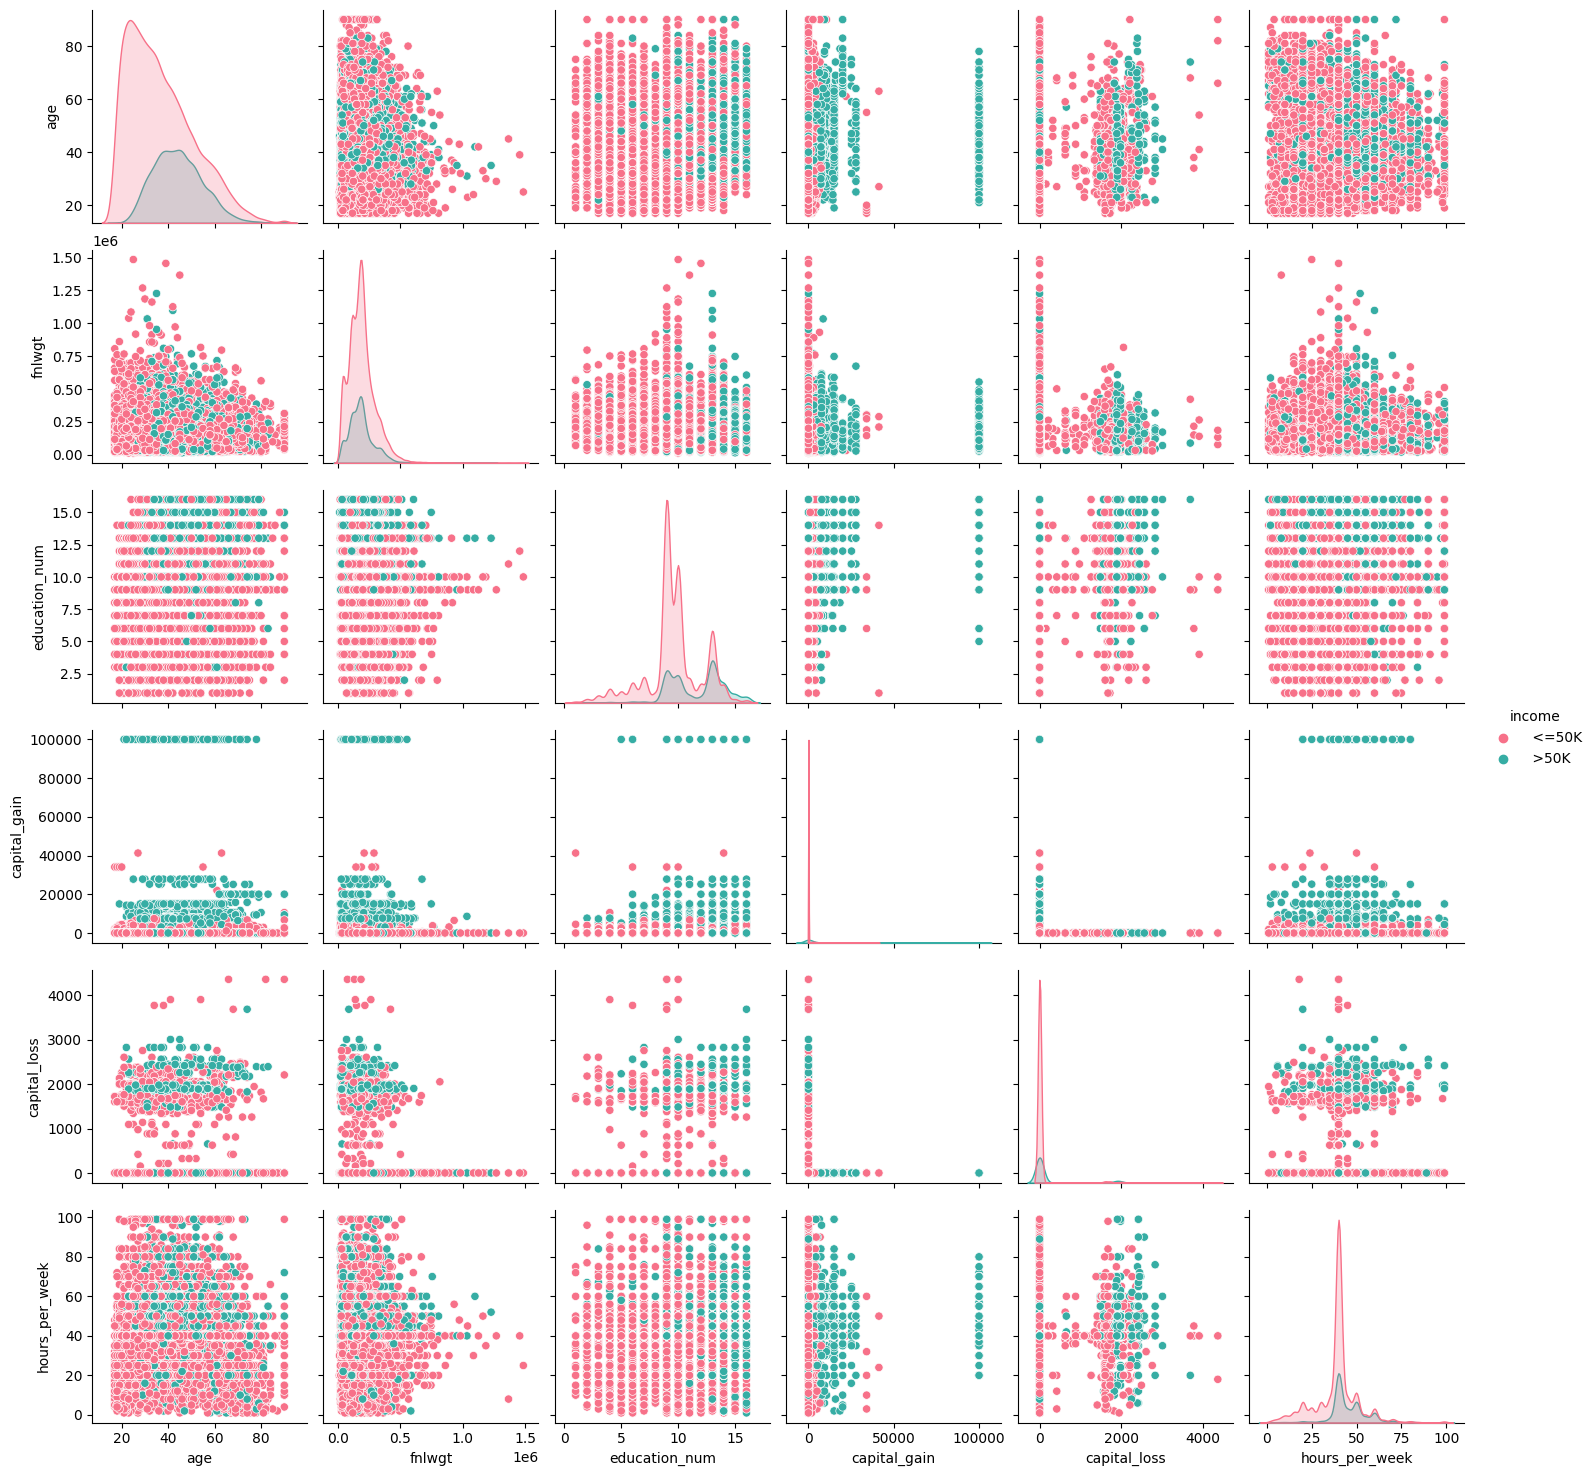

In [211]:
sns.pairplot(data=adult_df, vars=['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'], hue='income', palette='husl')